In [ ]:
cd /content/drive/MyDrive

/content/drive/MyDrive


In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression

In [ ]:
df = pd.read_csv('stroke_dataset.csv')
df = df.dropna()
df = df.drop('id', axis=1)  #  불필요한 열 삭제

In [ ]:
df = df.sample(frac=1).reset_index(drop=True) # 행 랜덤하게 섞기

In [ ]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Female,37.0,0,0,Yes,Private,Urban,100.22,22.7,smokes,0
1,Male,57.0,0,1,Yes,Self-employed,Urban,92.82,27.8,formerly smoked,0
2,Male,6.0,0,0,No,children,Rural,131.43,17.7,Unknown,0
3,Male,27.0,0,0,Yes,Private,Urban,76.19,22.0,never smoked,0
4,Female,14.0,0,0,No,Never_worked,Urban,148.37,22.7,never smoked,0


In [ ]:
# 데이터 전처리
df['gender'] = df['gender'].map({'Male': 0, 'Female': 1, 'Other': 2})
df['ever_married'] = df['ever_married'].map({'No': 0, 'Yes': 1})
df['work_type'] = df['work_type'].map({'children': 0, 'Govt_job': 1, 'Never_worked': 2, 'Private': 3, 'Self-employed': 4})
df['Residence_type'] = df['Residence_type'].map({'Rural': 0, 'Urban': 1})
df['smoking_status'] = df['smoking_status'].map({'formerly smoked': 0, 'never smoked': 1, 'smokes': 2, 'Unknown': 3})

In [ ]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,35.0,0,0,1,3,0,58.72,40.0,2,0
1,1,7.0,0,0,0,0,0,85.15,15.1,3,0
2,0,52.0,0,0,1,1,1,86.06,29.2,0,0
3,0,46.0,0,0,1,3,0,92.81,30.8,3,0
4,1,54.0,0,0,1,3,0,118.51,40.6,1,0


In [ ]:
# Normalization
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[:] = scaler.fit_transform(df[:])

In [ ]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0.5,0.450684,0.0,0.0,1.0,0.75,1.0,0.208199,0.142039,0.666667,0.0
1,0.0,0.694824,0.0,1.0,1.0,1.00,1.0,0.174037,0.200458,0.000000,0.0
2,0.0,0.072266,0.0,0.0,0.0,0.00,0.0,0.352276,0.084765,1.000000,0.0
3,0.0,0.328613,0.0,0.0,1.0,0.75,1.0,0.097267,0.134021,0.333333,0.0
4,0.5,0.169922,0.0,0.0,0.0,0.50,1.0,0.430477,0.142039,0.333333,0.0


In [ ]:
# 결측치 개수 확인
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe8020789d0>,
      dtype=object)

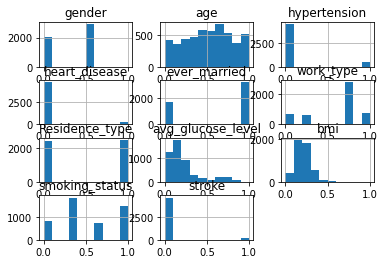

In [ ]:
# 히스토그램 출력
df.hist()

In [ ]:
# 독립변수와 종속변수 지정
features = df[['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status']]
target = df['stroke']

In [ ]:
# 학습 / 테스트 데이터셋 나누기
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2)

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# print(model.score(x_train, y_train))

In [ ]:
# print(model.score(x_test, y_test))

In [ ]:
pred_lr = model.predict(x_test)

In [ ]:
print(model.score(x_test, pred_lr)) # ?

1.0


In [ ]:
# from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
# print(accuracy_score(y_test, pred_lr))
# # print(f1_score(y_test, pred_lr))
# # print(precision_score(y_test, pred_lr))
# # print(recall_score(y_test, pred_lr))


0.9562118126272913


In [ ]:
# # Confusion Matrix
# from sklearn.metrics import confusion_matrix
# from IPython.display import Image

# cm = confusion_matrix(y_test, pred_lr)
# cm

array([[939,   0],
       [ 43,   0]])

Text(33.0, 0.5, 'Actual')

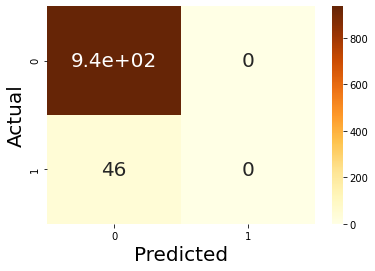

In [ ]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# sns.heatmap(cm, annot=True, annot_kws={"size": 20}, cmap='YlOrBr')
# plt.xlabel('Predicted', fontsize=20)
# plt.ylabel('Actual', fontsize=20)

In [ ]:
from sklearn.svm import SVC

In [ ]:
svm = SVC(kernel='linear', C=0.5, random_state=0, probability=True)

In [ ]:
svm.fit(x_train, y_train)

SVC(C=0.5, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=True, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
print(svm.score(x_train, y_train))

0.9567099567099567


In [ ]:
print(svm.score(x_test, y_test))

0.960285132382892


In [ ]:
pred_svm = svm.predict(x_test)

In [ ]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
from IPython.display import Image

cm = confusion_matrix(y_test, pred_svm)
cm

array([[943,   0],
       [ 39,   0]])

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, pred_lr)
mse = mean_squared_error(y_test, pred_lr)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, pred_lr)

In [ ]:
print(mae)
print(mse)
print(rmse)
print(r2)

0.03971486761710794
0.03971486761710794
0.1992858941749464
-0.04135737009544038


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, pred_svm)
mse = mean_squared_error(y_test, pred_svm)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, pred_svm)

In [ ]:
print(mae)
print(mse)
print(rmse)
print(r2)

0.03971486761710794
0.03971486761710794
0.1992858941749464
-0.04135737009544038


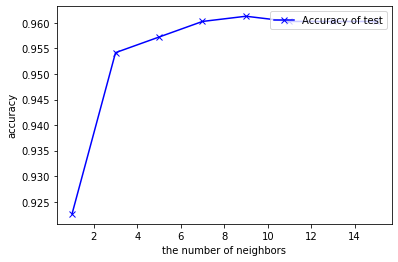

In [ ]:
# kNN
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

test_result = []
k_neighbors = [1,3,5,7,9,11,13,15]

for k_neighbor in k_neighbors:
    kNN_classifier = KNeighborsClassifier(n_neighbors = k_neighbor)
    kNN_classifier.fit(x_train,y_train)

    y_hat = kNN_classifier.predict(x_test)
    accuracy = accuracy_score(y_test, y_hat)
    test_result.append(accuracy)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(k_neighbors, test_result, '-x', c='blue', label="Accuracy of test")
plt.xlabel('the number of neighbors')
plt.ylabel('accuracy')
plt.legend(loc='upper right')
plt.show()

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.836
SVM: ROC AUC=0.744


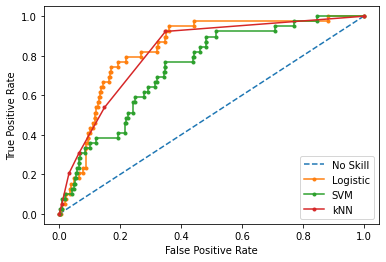

In [ ]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt


# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]
 
# predict probabilities
lr_probs = model.predict_proba(x_test)
svm_probs = svm.predict_proba(x_test)
knn_probs = kNN_classifier.predict_proba(x_test)
 
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
svm_probs = svm_probs[:, 1]
knn_probs = knn_probs[:, 1]
 
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
svm_auc = roc_auc_score(y_test, svm_probs)
knn_auc = roc_auc_score(y_test, knn_probs)
 
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
print('SVM: ROC AUC=%.3f' % (svm_auc))
 
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
svm_fpr, svm_tpr, _ = roc_curve(y_test, svm_probs)
knn_fpr, knn_tpr, _ = roc_curve(y_test, knn_probs)
 
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
plt.plot(svm_fpr, svm_tpr, marker='.', label='SVM')
plt.plot(knn_fpr, knn_tpr, marker='.', label='kNN')
 
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
 
# show the legend
plt.legend()
 
# show the plot
plt.show()